## C++ and LaTeX code generation with Sympy 

**Antoine Falaize**, CNRS UMR 7356 LaSIE, Université de la Rochelle, France

-----------------

**Conférence _Python Scientifique_**

*Université de La Rochelle - 14 Juin 2017*

#### What is SymPy

From the [web site](http://www.sympy.org/fr/): *SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python. *

#### Why use SymPy
* Symbolic derivatives (optimization, nonlinear solvers, ...)
* C++ Code generation (performance, portability, ...)
* LaTeX Code generation (documentation, publication, ...)

<!-- TEASER_END -->

#### Standard Python Import

In [1]:
import sympy as sp

# in IPythonNoteBook: activates pretty printing of mathematical functions
sp.init_printing(use_latex='mathjax')

#### Here: Simulation of a parametric Hamiltonian system

$${\small
\begin{array}{rcl}
\dot{\mathbf x} =  \mathbf J \cdot \nabla H(\mathbf x),
\qquad 
H(\mathbf x) = \frac{x_0^2}{2} + \operatorname{cosh}\left(\frac{10}{\pi}x_1\right) -1, 
\qquad 
\mathbf J(\tau) =
\left(
\begin{array}{rr}
0& -\tau^2
\\
\tau^2& 0
\end{array} 
\right).
\end{array}
}$$

### 1. Basics: Definition of Symbols and Expressions
$${\small
\begin{array}{rcl}
\dot{\mathbf x} =  \mathbf J \cdot \nabla H(\mathbf x),
\qquad 
H(\mathbf x) = \frac{x_0^2}{2} + \operatorname{cosh}\left(\frac{10}{\pi}x_1\right) -1, 
\qquad 
\mathbf J(\tau) =
\left(
\begin{array}{rr}
0& -\tau^2
\\
\tau^2& 0
\end{array} 
\right).
\end{array}
}$$

In [2]:
tau = sp.symbols('tau')  # Symbol
tau

τ

In [3]:
x = list(sp.symbols('x:2'))  # Vector (list of symbols)
x

[x₀, x₁]

In [4]:
H = x[0]**2/2 + sp.cosh(10*x[1]/sp.pi)-1
H

  2                  
x₀        ⎛10⋅x₁⎞    
─── + cosh⎜─────⎟ - 1
 2        ⎝  π  ⎠    

### 1. Basics: Definition of Symbols and Expressions
#### Plots 

In [5]:
# Needed to plot inside Jupyter Notebook
%matplotlib inline      

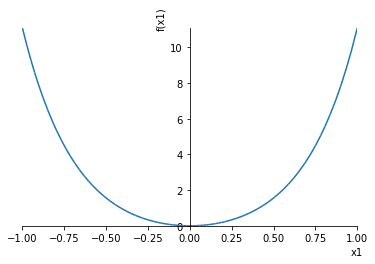

In [6]:
sp.plot(H.subs(x[0], 0), (x[1], -1, 1))

### 1. Basics: Definition of Symbols and Expressions
#### Plots 

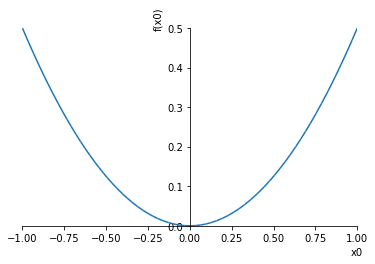

In [7]:
sp.plot(H.subs(x[1], 0), (x[0], -1, 1))

### 1. Basics: Definition of Symbols and Expressions
$${\small
\begin{array}{rcl}
\dot{\mathbf x} =  \mathbf J \cdot \nabla H(\mathbf x),
\qquad 
H(\mathbf x) = \frac{x_0^2}{2} + \operatorname{cosh}\left(\frac{10}{\pi}x_1\right) -1, 
\qquad 
\mathbf J(\tau) =
\left(
\begin{array}{rr}
0& -\tau^2
\\
\tau^2& 0
\end{array} 
\right).
\end{array}
}$$

In [8]:
dxH = map(H.diff, x) # Vector (list of expressions)  
dxH

⎡           ⎛10⋅x₁⎞⎤
⎢    10⋅sinh⎜─────⎟⎥
⎢           ⎝  π  ⎠⎥
⎢x₀, ──────────────⎥
⎣          π       ⎦

In [9]:
J = tau**2 * sp.Matrix([[0, -1], [1, 0]])  # Matrix (table of expressions)
J

⎡      2⎤
⎢0   -τ ⎥
⎢       ⎥
⎢ 2     ⎥
⎣τ    0 ⎦

### 2. Symbolic Numerical Method: the Theta scheme
$$
\begin{array}{rcl}
\mathbf 0 = \mathbf F(\delta \mathbf x) =  \frac{\delta \mathbf x}{\delta t} - \mathbf J(\tau) \cdot \nabla H(\mathbf x_n + \theta\,\delta \mathbf x); \qquad \mathbf x_{n+1} = \mathbf x_n + \delta \mathbf x; \qquad x_0 \;\mbox{known}.
\end{array}
$$

In [10]:
dt, theta = sp.symbols(('delta_t', 'theta'))
dx = map(lambda xi: sp.symbols('delta_'+str(xi)), x)
dtx = map(lambda dxi: dxi/dt, dx)
dtx

⎡δₓ₀  δₓ₁⎤
⎢───, ───⎥
⎣δ_t  δ_t⎦

### 2. Symbolic Numerical Method: the Theta scheme

$$
\begin{array}{rcl}
\mathbf 0 = \mathbf F(\delta \mathbf x) =  \frac{\delta \mathbf x}{\delta t} - \mathbf J(\tau) \cdot \nabla H(\mathbf x_n + \theta\,\delta \mathbf x); \qquad \mathbf x_{n+1} = \mathbf x_n + \delta \mathbf x; \qquad x_0 \;\mbox{known}.
\end{array}
$$

In [11]:
subs = {}
for i, xi in enumerate(list(x)):
    subs[xi] = xi + theta*dx[i]
dxH = [dxHi.subs(subs) for dxHi in dxH]
dxH

⎡                   ⎛10⋅(δₓ₁⋅θ + x₁)⎞⎤
⎢            10⋅sinh⎜───────────────⎟⎥
⎢                   ⎝       π       ⎠⎥
⎢δₓ₀⋅θ + x₀, ────────────────────────⎥
⎣                       π            ⎦

In [12]:
F = map(sp.Add, dtx, (-J).dot(dxH))

In [13]:
F

⎡    2     ⎛10⋅(δₓ₁⋅θ + x₁)⎞                               ⎤
⎢10⋅τ ⋅sinh⎜───────────────⎟                               ⎥
⎢          ⎝       π       ⎠   δₓ₀     2                δₓ₁⎥
⎢─────────────────────────── + ───, - τ ⋅(δₓ₀⋅θ + x₀) + ───⎥
⎣             π                δ_t                      δ_t⎦

### 3. Numerical evaluation of symbolic expressions

$$
\begin{array}{rcl}
\mathbf 0 = \mathbf F(\delta \mathbf x) =  \frac{\delta \mathbf x}{\delta t} - \mathbf J(\tau) \cdot \nabla H(\mathbf x + \theta\,\delta \mathbf x); \qquad \mathbf x_{n+1} = \mathbf x_n + \delta \mathbf x; \qquad x_0 \;\mbox{known}.
\end{array}
$$

In [14]:
pars = [tau, dt, theta]

In [15]:
args = dx + x + pars

In [16]:
F_lambdify = sp.lambdify(args, F, modules='numpy')
def F_num(*args):    # Recast output as numpy array
    return np.array(F_lambdify(*args))

In [17]:
import numpy as np
F_num(*np.random.rand(7))    # Evaluate with random values

array([ 3.6989806 ,  0.55891647])

### 4. Newton-like solvers need the Jacobian of implicit function

$$
\delta \mathbf x_{i+1} = \delta \mathbf x_i + \mathcal J_{\mathbf F}(\delta \mathbf x_i)^{-1}\cdot\mathbf F(\delta \mathbf x_i); \qquad [\mathcal J_{\mathbf F}(\delta \mathbf x_i)]_{k,l} = \frac{\partial [\mathbf F]_{k}}{\partial [\mathbf \delta \mathbf x]_{l}}
$$

In [18]:
nF, ndx = len(F), len(dx)
jacF = sp.zeros(nF, ndx)    # Init sympy matrix

In [19]:
for k in range(nF):
    for l in range(ndx):
        jacF[k, l] = sp.diff(F[k], dx[l]).simplify()    # derivative

In [20]:
jacF

⎡            2       ⎛10⋅(δₓ₁⋅θ + x₁)⎞⎤
⎢       100⋅τ ⋅θ⋅cosh⎜───────────────⎟⎥
⎢  1                 ⎝       π       ⎠⎥
⎢ ───   ──────────────────────────────⎥
⎢ δ_t                  2              ⎥
⎢                     π               ⎥
⎢                                     ⎥
⎢  2                  1               ⎥
⎢-τ ⋅θ               ───              ⎥
⎣                    δ_t              ⎦

In [21]:
jacF_num = sp.lambdify(args, jacF, modules='numpy')    # Build numerical function

#### Here, we use SciPy root finding method

In [22]:
from scipy.optimize import root

#### Need to parse SymPy functions to SciPy solvers

In [23]:
def scipy_func(dx, x, pars):
    return F_num(*(list(dx)+list(x)+pars))

def scipy_jacfunc(dx, x, pars):
    return jacF_num(*(list(dx)+list(x)+pars))

### 6. Simulation

#### Parameters

In [24]:
dt_num = 1e-1   # Sample period (s)
tau_num = 1.    # Parameter: System characteristic time (s)
theta_num = 0.5  # Scheme parameter: 0=Euler Explicit, 1=Euler implicit, 0.5=Midpoint rule
pars_num = [tau_num, dt_num, theta_num]

In [25]:
nt = int(1e4)    # Number of time steps
x0 = [1., 0.]    # State init.

In [26]:
X_seq = np.zeros((len(x), nt))    # Sequence
X_seq[:, 0] = x0

In [27]:
DX_seq = np.zeros((len(dx), nt))    # Sequence

#### Execution

In [28]:
for i in range(1, nt):
    X_seq[:, i] = X_seq[:, i-1] + DX_seq[:, i-1]    # x[i] = x[i-1] + dx[i-1]
    res = root(scipy_func, DX_seq[:, -i], (X_seq[:, i], pars_num), jac=scipy_jacfunc)
    DX_seq[:, i] = res.x    # F(dx[i]) = 0
    

### Plot of results

In [29]:
import matplotlib.pyplot as plt    # Plot module

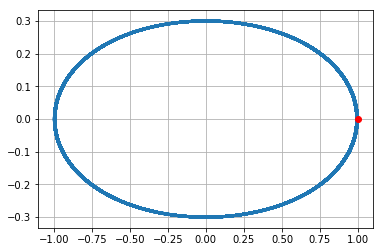

In [30]:
plt.plot(X_seq[0, :], X_seq[1, :])    # Plot trajectory (blue)
plt.plot(X_seq[0, 0], X_seq[1, 0], 'or')    # Add a red dot at init
plt.grid('on')    # Display grid 

### 7. C++ Code Generation with SymPy

In [31]:
from sympy.printing import ccode

#### Single expression

In [32]:
H    # Recall

  2                  
x₀        ⎛10⋅x₁⎞    
─── + cosh⎜─────⎟ - 1
 2        ⎝  π  ⎠    

In [33]:
ccode(H, dereference=args)    # Print C++ code

'(1.0L/2.0L)*pow((*x0), 2) + cosh(10*(*x1)/M_PI) - 1'

#### Matrix expression (via a template)

In [34]:
def cpp_generator(mat, args, name, label):
    update_cpp = '\nvoid {0}::{1}_update()'.format(label, name) + '{'
    for n in range(mat.shape[1]):
        for m in range(mat.shape[0]):
            expr = mat[m, n]
            symbs = expr.free_symbols
            c = ccode(expr, dereference=args)
            update_cpp += '\n_{0}({1}, {2}) = {3};'.format(name, m, n, c)
    update_cpp += '\n};'
    return update_cpp

In [35]:
F    # Recall  

⎡    2     ⎛10⋅(δₓ₁⋅θ + x₁)⎞                               ⎤
⎢10⋅τ ⋅sinh⎜───────────────⎟                               ⎥
⎢          ⎝       π       ⎠   δₓ₀     2                δₓ₁⎥
⎢─────────────────────────── + ───, - τ ⋅(δₓ₀⋅θ + x₀) + ───⎥
⎣             π                δ_t                      δ_t⎦

In [36]:
label = 'myobject'
mat = sp.Matrix(F)
name = 'F'
code = cpp_generator(mat, args, name, label)    # Print C++ code
print(code)


void myobject::F_update(){
_F(0, 0) = 10*pow((*tau), 2)*sinh(10*((*delta_x1)*(*theta) + (*x1))/M_PI)/M_PI + (*delta_x0)/(*delta_t);
_F(1, 0) = -pow((*tau), 2)*((*delta_x0)*(*theta) + (*x0)) + (*delta_x1)/(*delta_t);
};


#### Matrix expression (via a template)

In [37]:
jacF    # Recall  

⎡            2       ⎛10⋅(δₓ₁⋅θ + x₁)⎞⎤
⎢       100⋅τ ⋅θ⋅cosh⎜───────────────⎟⎥
⎢  1                 ⎝       π       ⎠⎥
⎢ ───   ──────────────────────────────⎥
⎢ δ_t                  2              ⎥
⎢                     π               ⎥
⎢                                     ⎥
⎢  2                  1               ⎥
⎢-τ ⋅θ               ───              ⎥
⎣                    δ_t              ⎦

In [38]:
label = 'myobject'
mat = jacF
name = 'jacF'
code = cpp_generator(mat, args, name, label)    # Print C++ code
print(code)


void myobject::jacF_update(){
_jacF(0, 0) = 1.0/(*delta_t);
_jacF(1, 0) = -pow((*tau), 2)*(*theta);
_jacF(0, 1) = 100*pow((*tau), 2)*(*theta)*cosh(10*((*delta_x1)*(*theta) + (*x1))/M_PI)/pow(M_PI, 2);
_jacF(1, 1) = 1.0/(*delta_t);
};


### 8. LaTeX Code Generation with SymPy

In [39]:
from sympy.printing import latex

#### Single expression

In [40]:
H    # Recall

  2                  
x₀        ⎛10⋅x₁⎞    
─── + cosh⎜─────⎟ - 1
 2        ⎝  π  ⎠    

In [41]:
print(latex(H))    # Print latex code

\frac{x_{0}^{2}}{2} + \cosh{\left (\frac{10 x_{1}}{\pi} \right )} - 1


Render:
$$
\frac{x_{0}^{2}}{2} + \cosh{\left (\frac{10 x_{1}}{\pi} \right )} - 1
$$    

#### Matrix expression

In [42]:
jacF    # Recall  

⎡            2       ⎛10⋅(δₓ₁⋅θ + x₁)⎞⎤
⎢       100⋅τ ⋅θ⋅cosh⎜───────────────⎟⎥
⎢  1                 ⎝       π       ⎠⎥
⎢ ───   ──────────────────────────────⎥
⎢ δ_t                  2              ⎥
⎢                     π               ⎥
⎢                                     ⎥
⎢  2                  1               ⎥
⎢-τ ⋅θ               ───              ⎥
⎣                    δ_t              ⎦

In [43]:
print(latex(jacF))    # Print latex code

\left[\begin{matrix}\frac{1}{\delta_{t}} & \frac{100 \theta}{\pi^{2}} \tau^{2} \cosh{\left (\frac{1}{\pi} \left(10 \delta_{x1} \theta + 10 x_{1}\right) \right )}\\- \tau^{2} \theta & \frac{1}{\delta_{t}}\end{matrix}\right]


Render:
$$
\left[\begin{matrix}\frac{1}{\delta_{t}} & \frac{100 \theta}{\pi^{2}} \tau^{2} \cosh{\left (\frac{1}{\pi} \left(10 \delta_{x1} \theta + 10 x_{1}\right) \right )}\\- \tau^{2} \theta & \frac{1}{\delta_{t}}\end{matrix}\right]
$$    

### Conclusions

* Standard workflow:
    1. Define SymPy symbols and Expressions,
    2. Combine these objects in a class,
    3. Generate C++ code via templates,
    4. Use CMake for crossplatform builds,
    5. Save results to disk for large data and Python $\leftrightarrow$ C++ exchange 

### Conclusions

* SymPy can be used to 
    - Manipulate and simplify complex expressions in pure Python
    - Build Structured Mathematical Object
    - Generate code for Simulation (C++) and Documentation (LatTeX)

### Example: the PyPHS package
Graph modeling and Simulation of Multiphysical systems in the Port-Hamiltonian Systems formalism.
![graph](https://afalaize.github.io/pyphs/figures/home2.png)

### Example: the PyPHS package
Graph modeling and Simulation of multiphysical systems in the Port-Hamiltonian Systems formalism.
![PyPHS](https://afalaize.github.io/pyphs/figures/home1.png)

### Thank you for your attention

Links:
* [This notebook](https://afalaize.github.io/posts/170614_ulr_python/)
* [PyPHS](https://afalaize.github.io/pyphs/)
